In [3]:
%matplotlib inline

In [4]:
import itertools 
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects

import numpy as np
import pandas as pd

# (scale, length, randomness).)
#plt.xkcd()
import highlight_text as ht

import intro_plots as ip
from papercolors import colordict as pcd

paper_path = Path('../figures/')


In [5]:
# tau 
df = pd.read_csv("plot_data")

In [36]:
df['NAME']

0    NEW YORK LAGUARDIA AP
1                ALBANY AP
2     NEW YORK JFK INTL AP
3    ISLIP LI MACARTHUR AP
4    ROCHESTER GTR INTL AP
Name: NAME, dtype: object

In [7]:
df['AC'] = df['NAME'].replace(ip.airport_codes)

In [8]:
color=pcd['fiber']
rows = ["NAME", "TEMP (°F)", "PRCP (in.)"]

fiber_node = (r"<$F_{node}=$>"+ f"<{rows[0]}>:" + r"<$\{st_0,\;\dots,\;st_n\}\; \times$>" + 
              f"<{rows[1]}>:" + r"<$\mathbb{R}\;\times$>" +
              f"<{rows[2]}>:" + r"<$\mathbb{R}^{+}$>")


fnprops = [{"color":pcd['fiber'], 'fontsize':12}, {"color":"gray","fontsize":10}, 
           {"color":pcd['fiber'], 'fontsize':12}, 
           {"color":"gray","fontsize":10}, {"color":pcd['fiber'], 'fontsize':12}, 
           {"color":"gray","fontsize":10}, {"color":pcd['fiber'], 'fontsize':12}]

fiber_edge = r"<$F_{edge}$>" + "<DISTANCE>:" +r"<$\mathbb{R}^{+}$>"
feprops = [{"color":pcd['fiber'], 'fontsize':12}, {"color":"gray","fontsize":10}, 
           {"color":pcd['fiber'], 'fontsize':12}]
section = r"<$\tau($>" + "<{k}>" + r"<$)$>"
fiber_line = r"$\mathbb{R}^{+}$"

#x = np.linspace(-5,5,10000)
#y = lambda x: (1/np.sqrt(2*np.pi))*np.e**(-x**2/2)



In [39]:
row = df[['AC','NAME', 'TEMP (°F)', 'PRCP (in.)', "NEW YORK JFK INTL AP"]].loc[0]
section_node = (section + 
'''< = {{><{k}><, ><({v1},> <{v2}°,> <{v3})><}}>''') 
sprops = [{"color":pcd['section']}, {'color':pcd['base']}, {'color':pcd['section']}, 
          {'color':pcd['section']}, {'color':pcd['base']},  {'color':pcd['section']},
         {'color':ip.cdict[row['NAME']]}, {'color':ip.cdict[row['NAME']]}, {'color':ip.cdict[row['NAME']]},  
          {'color':pcd['section']}]
#print(section_node.format(k=0, v1=row['NAME'], v2=row['TEMP (°F)'], v3=row['PRCP (in.)']))
section_edge = (section + """<= {{><{k}><,({v:.2f})}}>""")
seprops = [{"color":pcd['section']}, {'color':pcd['base']}, {'color':pcd['section']}, 
           {'color':pcd['section']}, {'color':pcd['base']},  {'color':pcd['section']}]

In [40]:
def make_node(fig, ax):
    yloc = 1.25
    ypts = .2
    xpts = [.1, 2.9]
        
    ht.ax_text(.05, yloc, s=fiber_node, highlight_textprops=fnprops, ha='left', va='bottom', 
               ax=ax, transform=ax.transAxes)

    # node section
    ynmid = ypts+(yloc-ypts)/2
    pin = mpatches.FancyArrowPatch((xpts[0], yloc), (xpts[0], ypts), 
                                      arrowstyle='->', mutation_scale=20, color='gray')
    ax.add_artist(pin)
    ax.text(xpts[0], ynmid, r"$\pi$", color="gray", ha='right', va='center')
    
    ht.ax_text(xpts[0]+.1, ynmid+.1, section_node.format(k=0, v1=row['AC'], v2=row['TEMP (°F)'], v3=row['PRCP (in.)']), 
               highlight_textprops=sprops, fontsize=10)
    tau1 = mpatches.FancyArrowPatch((xpts[0], ypts), (xpts[0], yloc), color=pcd['section'],
                                     connectionstyle='arc3,rad=.2',  arrowstyle='->', mutation_scale=20)
    ax.add_artist(tau1)
    
    #edge section
    xloc = 2.3
    yloff = .3
    ht.ax_text(xloc, yloc-yloff, s=fiber_edge, highlight_textprops=feprops, ha='center', va='bottom' )
    
    xe = xloc-.4
    
    yemid = ypts + (yloc-yloff - ypts)/2
    pie = mpatches.FancyArrowPatch((xe, yloc-yloff), (xe, ypts), arrowstyle='->', 
                                   mutation_scale=20, color='gray')
    ax.add_artist(pie)
    ax.text(xe-.01, yemid, r"$\pi$", color="gray", ha='right', va='center')
    
    ht.ax_text(xe+.075, yemid, s=section_edge.format(k=.8, v= row["NEW YORK JFK INTL AP"]), 
                                                     highlight_textprops=seprops)
    tau2 = mpatches.FancyArrowPatch((xe, ypts), (xe, yloc-yloff), color=pcd['section'],
                                     connectionstyle='arc3,rad=.2',  arrowstyle='->', mutation_scale=20)
    ax.add_artist(tau2)
  
    ax.plot(xpts,[ypts, ypts],  color=pcd['base'], marker='o')
    for i, x in enumerate([xpts[0], xpts[0]+(xpts[1]-xpts[0])/2, xpts[1]]):
        ax.text(x, ypts-.03, f"$K_{i}$",color=pcd['base'], va='top', ha='center')
    
    ax.set(xlim=(0, 3), ylim=(0, 1.5), aspect='equal', yticks=[], xticks=[])
    ax.axis('off')

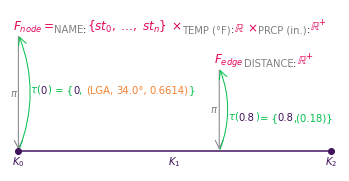

In [41]:
fig, ax = plt.subplots()
make_node(fig, ax)
fig.savefig(paper_path/"fbnet", bbox_inches='tight', dpi=200)

In [24]:
row

NAME                     NEW YORK JFK INTL AP
TEMP (°F)                                22.0
PRCP (in.)                             0.6299
NEW YORK LAGUARDIA AP                0.183772
Name: 2, dtype: object

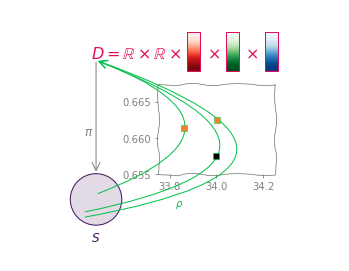

In [379]:
row = df[['NAME', 'TEMP (°F)', 'PRCP (in.)']].loc[0]
fig, ax = plt.subplots(figsize=(6,6))
x0 = .325
xt = x0+.02
ax.text(x0,.8, r"$D = \mathbb{R}\times\mathbb{R}$", fontsize=16, color=pcd['fiber'], ha='left')

#(left, right, bottom, top)
pad = .15
xc = .7
for cmap, xo in zip([plt.cm.Reds, plt.cm.Greens, plt.cm.Blues], np.array([xc, xc+pad, xc+pad*2])):
    ax.text(xo-pad/2, .8, r"$\times$", fontsize=16, color=pcd['fiber'])
    extents = [xo, xo+.05, .75, .9]
    im = ax.imshow(np.array([[0.,1.], [0.,1.]]).T, cmap = cmap, interpolation = 'bicubic', extent=extents)
    ax.add_patch(mpatches.Rectangle((extents[0], extents[2]), extents[1]-extents[0], extents[3]-extents[2], 
                                    facecolor='none', edgecolor=pcd['fiber']))
   
    
yb = .25
ax.add_patch(mpatches.Circle((xt, yb), .1, edgecolor=pcd['base'], 
                                    facecolor=mcolors.to_rgba(pcd['base'], alpha=.15)))
ax.text(xt, yb-.15, r"$S$", va='center', ha='center', color=pcd['base'], fontsize=12)

ax.text(xt-.01 ,.5, r"$\pi$", ha='right', fontsize=12, color='gray')

pi = mpatches.FancyArrowPatch((xt, .79),(xt, yb+.1), arrowstyle='->', mutation_scale=20, color='gray')
ax.add_artist(pi)
              
#ax.text(.6,.5, r"$\rho$ =", ha='left', va='center', fontsize=12, color=pcd['section'])
x, y = (row['TEMP (°F)'],row['PRCP (in.)'])
axrho = ax.inset_axes([.45, .35, .35, .35])
axrho.spines[:].set_sketch_params(1, 100, 10)
axrho.spines[:].set_color('gray')
axrho.tick_params(colors='gray')

#axrho.scatter(x,y, color= ip.cdict[row['NAME']], s=400, edgecolor='k', alpha=.25)

cinner = ip.cdict[row['NAME']]
gsecs = [(.001, .001, -0.05, -.07, cinner, 'arc3,rad=1.87'), 
         (-.001, -.004, -.05, -.05,'k', 'arc3,rad=1.71'), 
         (-.14, 0, 0, .02, cinner, 'arc3,rad=1.325')]

for  (xo, yo, jx, jy, co, cs) in gsecs:
    rho = mpatches.FancyArrowPatch((xt+jx, yb+jy), (xt, .79),
                               arrowstyle='->', connectionstyle=cs,
                               mutation_scale=20, color=pcd['section'], zorder=6)
    
    ax.add_artist(rho)
  
    ax.scatter(x + xo,  y + yo, color=co, marker='s',
                  s=40, edgecolor=pcd['section'], linewidth=.5, zorder=12, 
                 transform=axrho.transData)

ax.text(.65, yb-.025, r"$\rho$", color=pcd['section'])

axrho.set(ylim=(.655, .6675), xlim=(33.75, 34.25))
ax.set(xlim=(0,1.3), ylim=(0,1), aspect='equal')
ax.axis('off')
fig.savefig("../figures/fb_rho.png", dpi=300, bbox_inches='tight')

In [966]:
    base = mpatches.Ellipse((1, .25), width=1.4, height=.2, facecolor='none', 
                            edgecolor=pcd['base'], lw=2)